In [1]:
pip install pandas numpy scikit-learn yfinance matplotlib


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
# Download stock data (e.g., Apple stock for the last 5 years)
ticker = 'MARICO.NS'  # You can change this to any stock ticker
data = yf.download(ticker, start='2018-01-01', end='2023-12-31')

# Display the first few rows of the data
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MARICO.NS,MARICO.NS,MARICO.NS,MARICO.NS,MARICO.NS
Date,,,,,
2018-01-01,286.625366,289.530051,285.105982,288.234104,346559
2018-01-02,291.094147,292.166629,283.988829,286.982895,880910
2018-01-03,286.759460,293.105086,285.776331,292.256013,1160639
2018-01-04,288.993835,289.574767,286.178531,286.178531,1060147
2018-01-05,292.211334,293.149760,285.686948,287.876645,1392301


In [4]:
# Create some simple features
data['Close_Lag1'] = data['Close'].shift(1)  # Previous day's closing price
data['Daily_Return'] = data['Close'].pct_change()  # Daily returns

# Drop any missing values generated by the shift() function
data = data.dropna()

# Display the new features
data[['Close', 'Close_Lag1', 'Daily_Return']].head()


Price,Close,Close_Lag1,Daily_Return
Ticker,MARICO.NS,,
Date,,,
2018-01-02,291.094147,286.625366,0.015591
2018-01-03,286.759460,291.094147,-0.014891
2018-01-04,288.993835,286.759460,0.007792
2018-01-05,292.211334,288.993835,0.011133
2018-01-08,288.815033,292.211334,-0.011623


In [5]:
# Define features and target
X = data[['Close_Lag1', 'Daily_Return']]
y = data['Close']  # We are predicting the closing price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [6]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 4.027637020946841


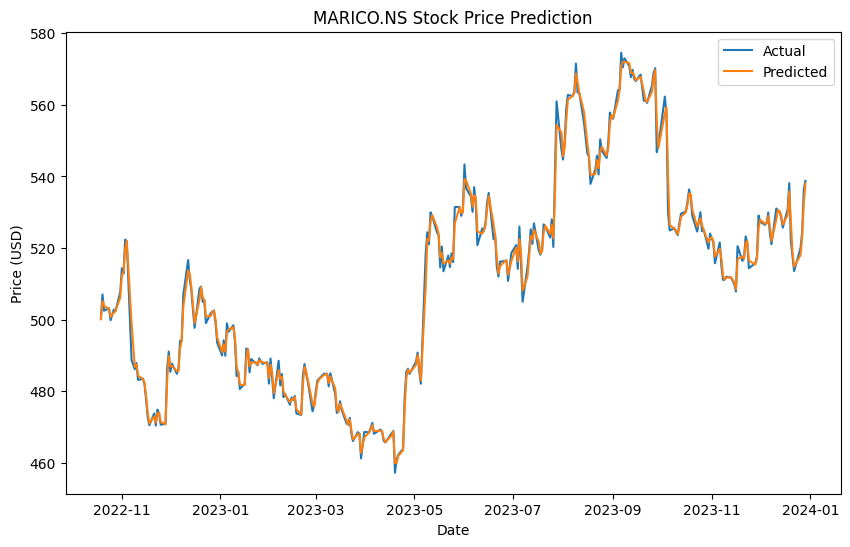

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) to assess the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the predictions vs actual values
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Mean Squared Error: 26.966622307227766


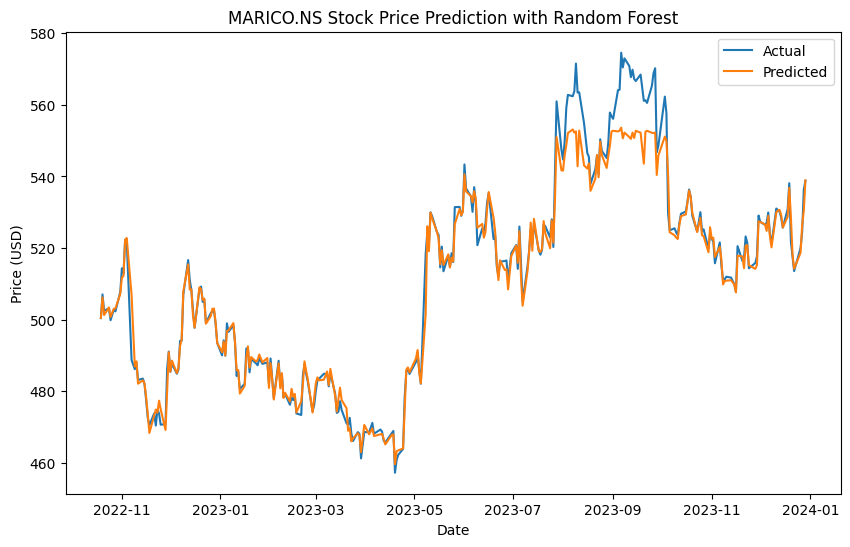

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate and print the mean squared error
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest Mean Squared Error: {rf_mse}")

# Plot the predictions vs actual values
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_pred, label='Predicted')
plt.title(f'{ticker} Stock Price Prediction with Random Forest')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
